<a href="https://colab.research.google.com/github/danielgarciamna/cienciadedatos/blob/master/RegresionLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---

*   NOMBRE: ---------------------------------------------------------
*   MATRÍCULA: ----------------------------------------------------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 9"
os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_df = pd.read_csv('data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de:

In [ ]:
data_df.set_index('id', inplace=True)



1a) Estadísticas descriptivas para todas las variables del dataframe.

In [ ]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


1b) Valores únicos por variable para identificar posibles variables categóricas.

In [ ]:
data_df.nunique().to_frame().sort_values(by=0)

,0
diagnosis,2
smoothness_worst,411
symmetry_mean,432
radius_mean,456
radius_worst,457
smoothness_mean,474
texture_mean,479
concave points_worst,492
symmetry_se,498
fractal_dimension_mean,499


In [ ]:
data_df['diagnosis'].info()

<class 'pandas.core.series.Series'>
Index: 569 entries, 842302 to 92751
Series name: diagnosis
Non-Null Count  Dtype 
--------------  ----- 
569 non-null    object
dtypes: object(1)
memory usage: 8.9+ KB


In [ ]:
data_df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

La columna diagnosis contiene únicamente dos valores: 'M' y 'B' para identificar si un tumor es benigno o maligno. Esta es una variabla categórica.

1c) Búsqueda de valores faltantes.

In [ ]:
data_df.isna().sum().sort_values()

,0
diagnosis,0
concave points_worst,0
concavity_worst,0
compactness_worst,0
smoothness_worst,0
area_worst,0
perimeter_worst,0
texture_worst,0
radius_worst,0
fractal_dimension_se,0


No hay valores faltantes

1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno)

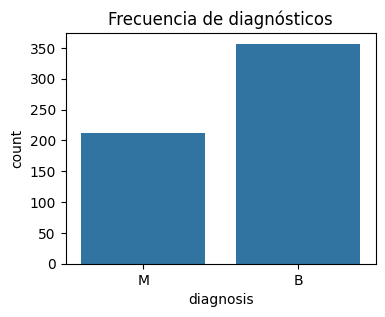

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x='diagnosis', data=data_df)
plt.title('Frecuencia de diagnósticos')
plt.show()

2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto.

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.

Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe.

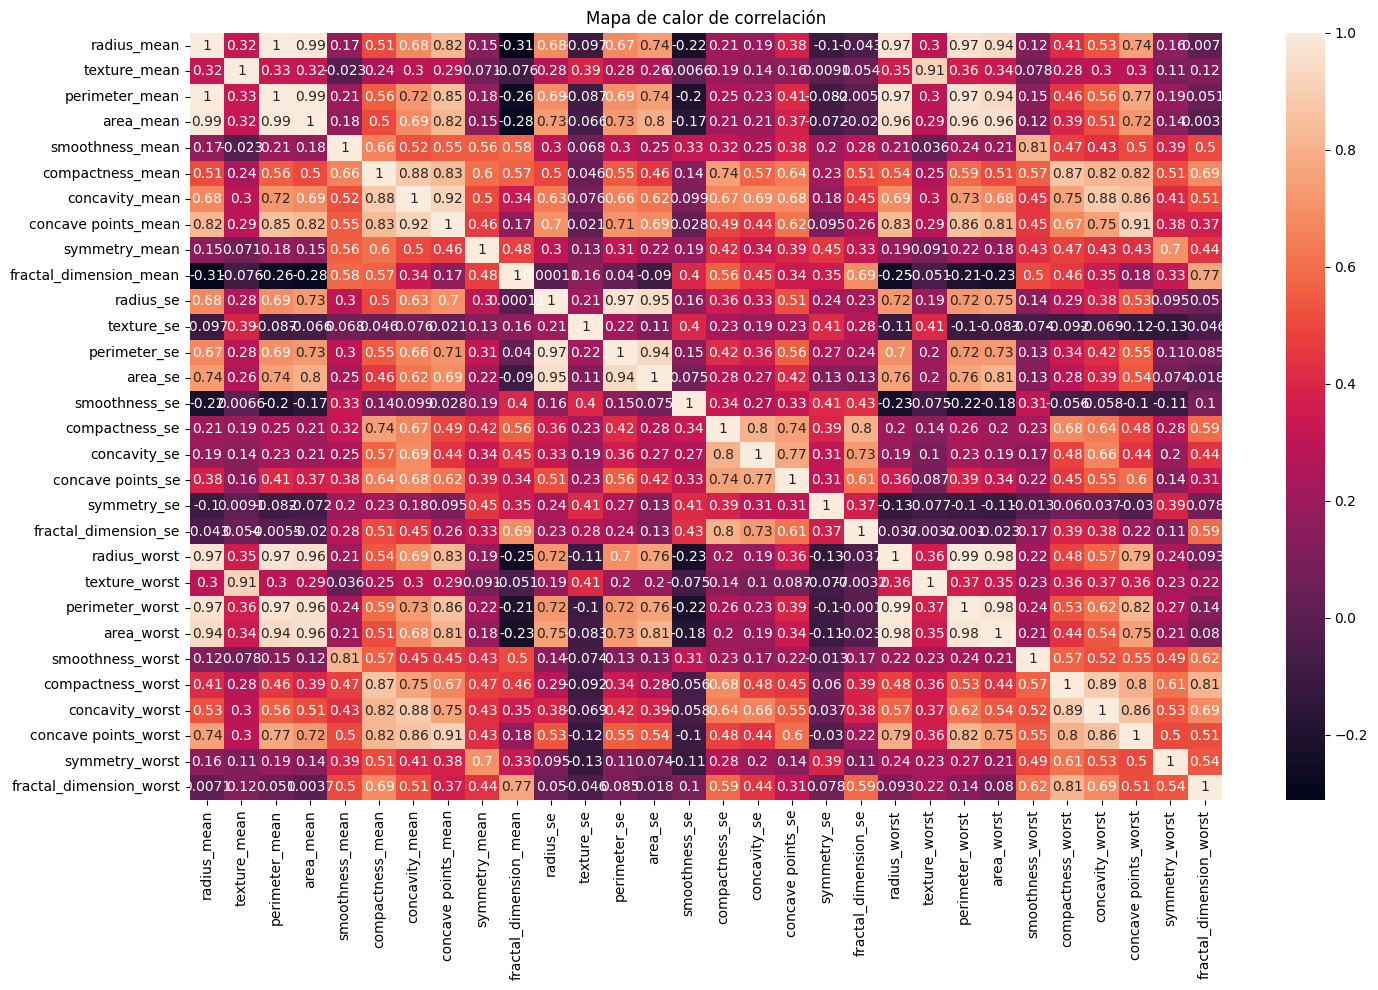

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data_df.corr(numeric_only=True), annot=True)
plt.title('Mapa de calor de correlación')
plt.tight_layout()
plt.show()

Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad.

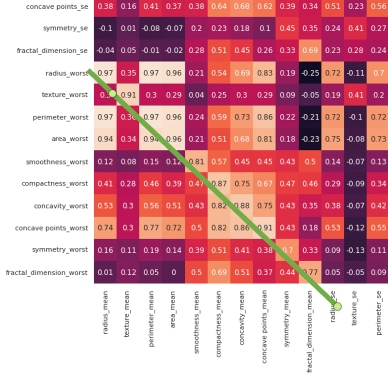

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias".

Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.

Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [ ]:
worst_features=[data_df.columns[i] for i in range(len(data_df.columns)) if '_worst' in data_df.columns[i]]
data_df.drop(columns=worst_features, inplace=True)

3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])
```




In [ ]:
mean_features= [data_df.columns[i] for i in range(len(data_df.columns)) if '_mean' in data_df.columns[i]]

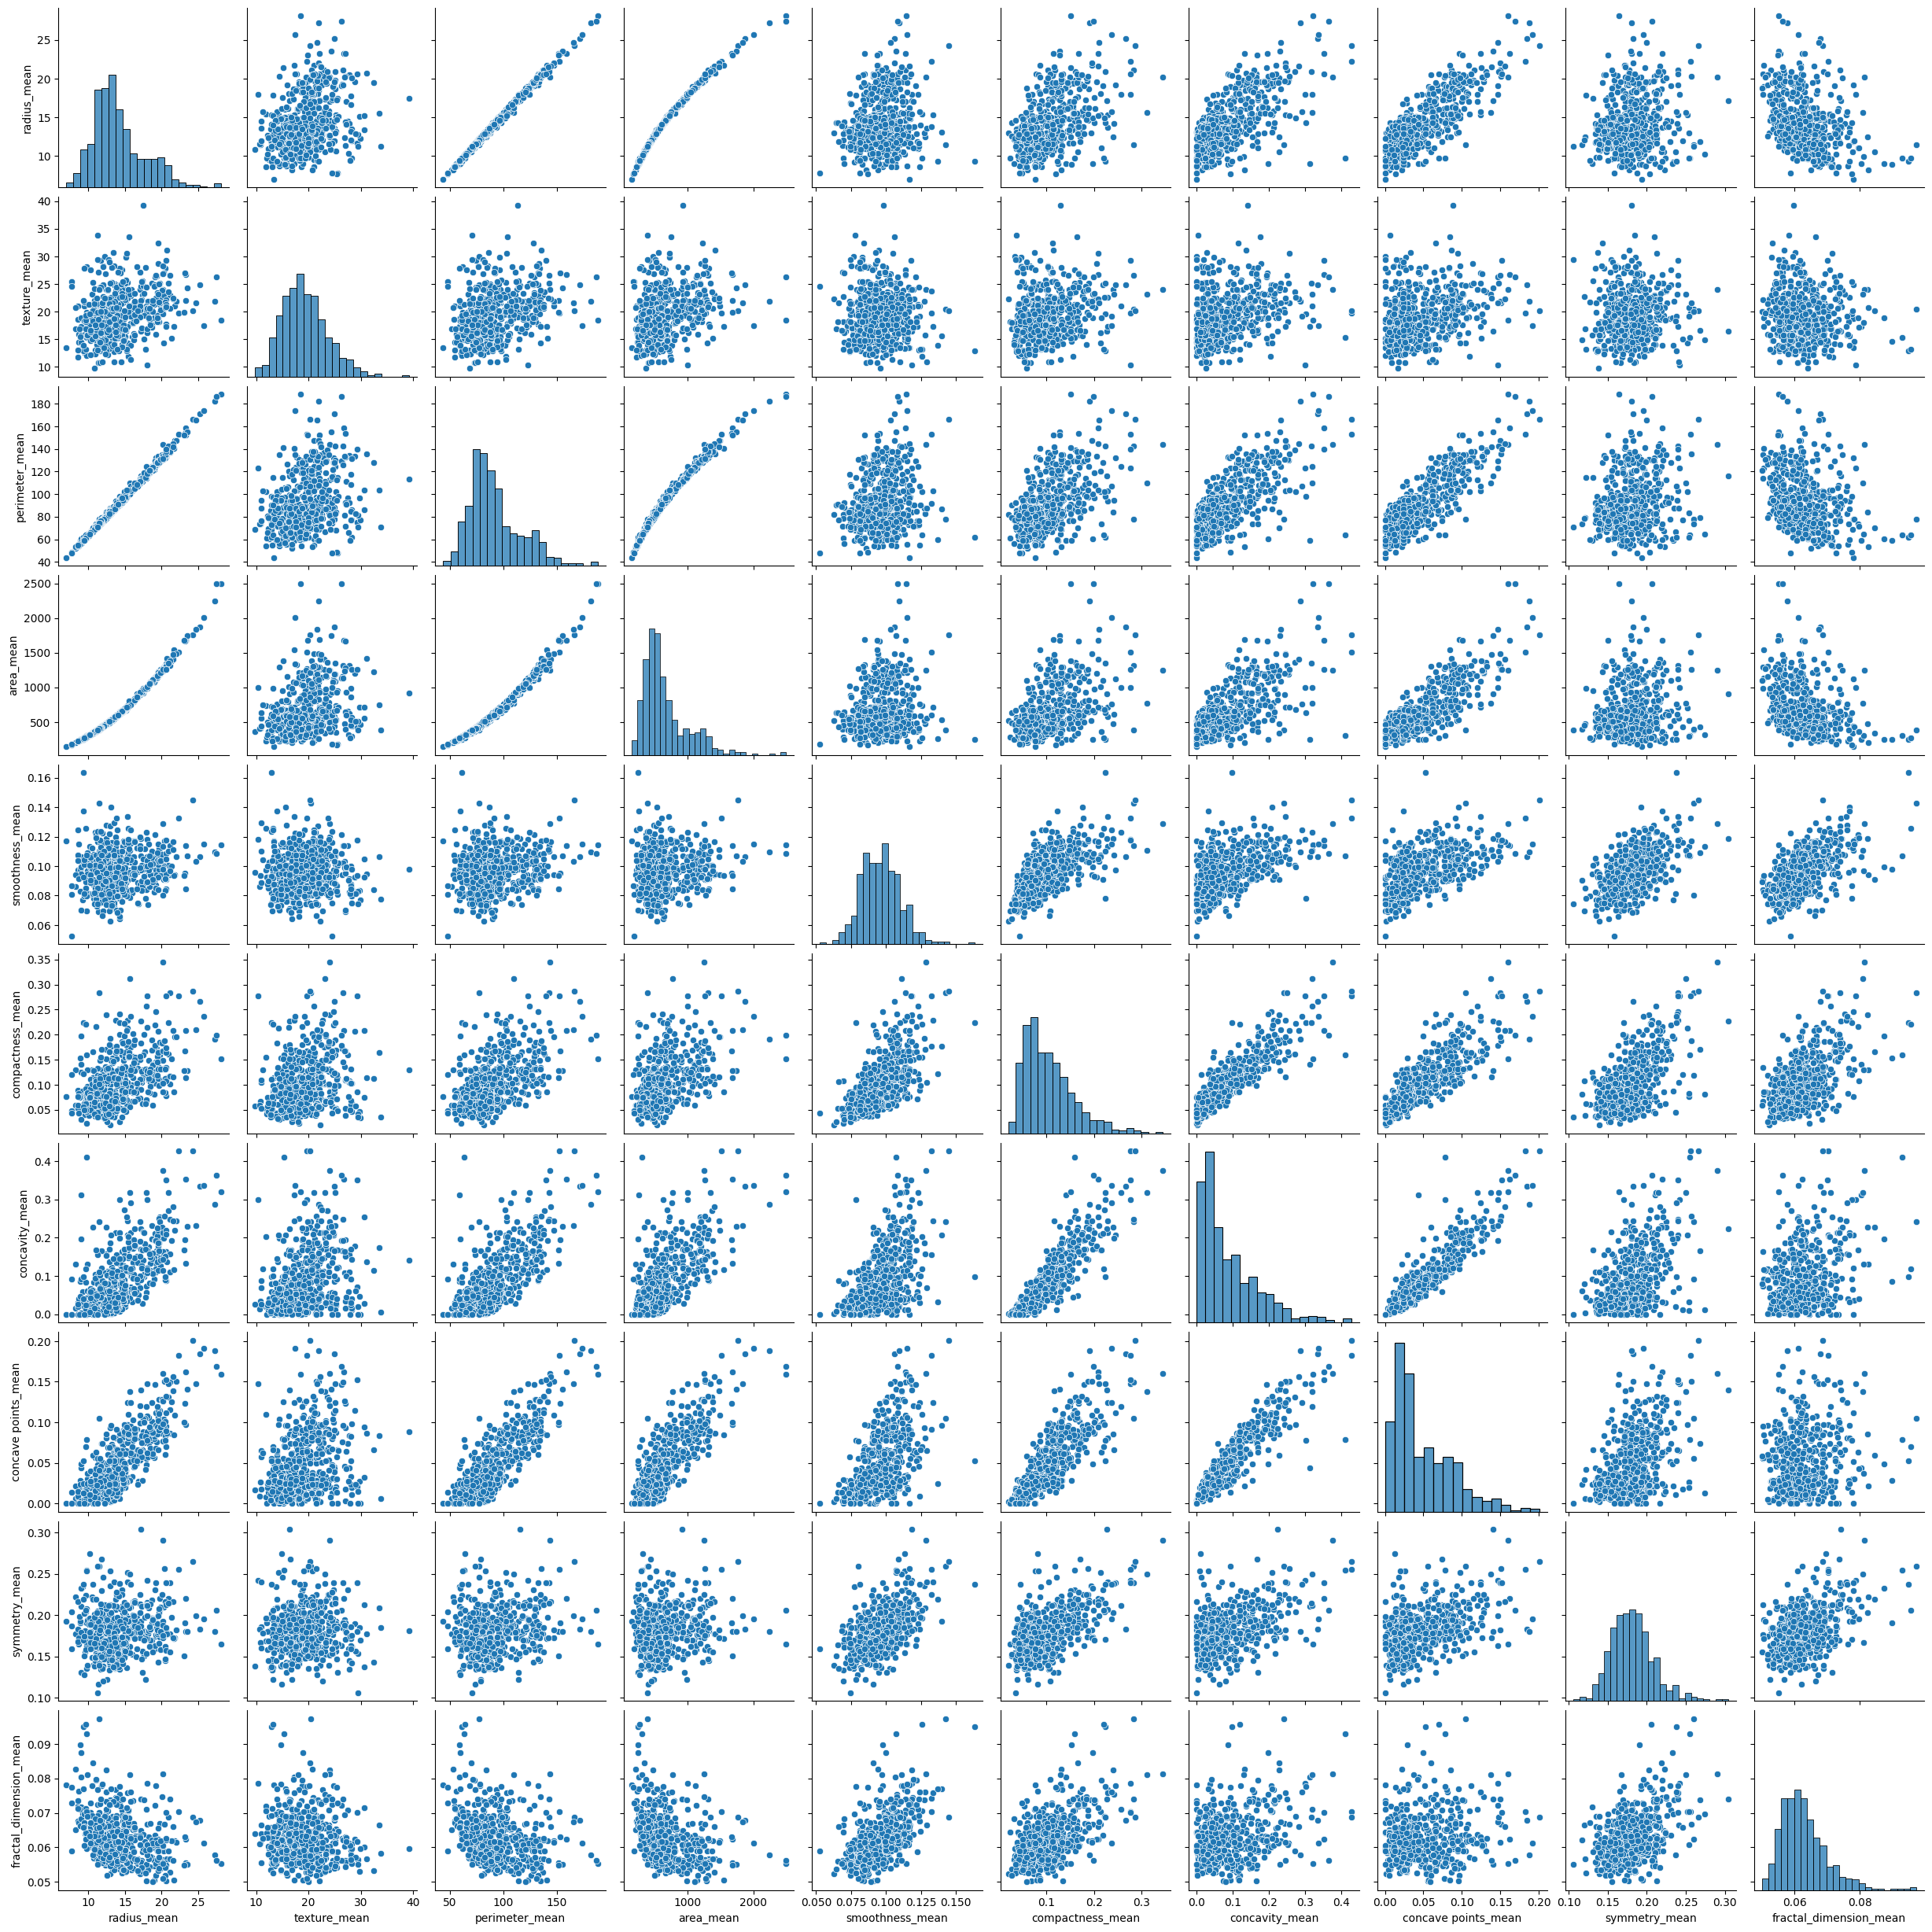

In [ ]:
sns.pairplot(data=data_df[mean_features])
plt.show()

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`

Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros.

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


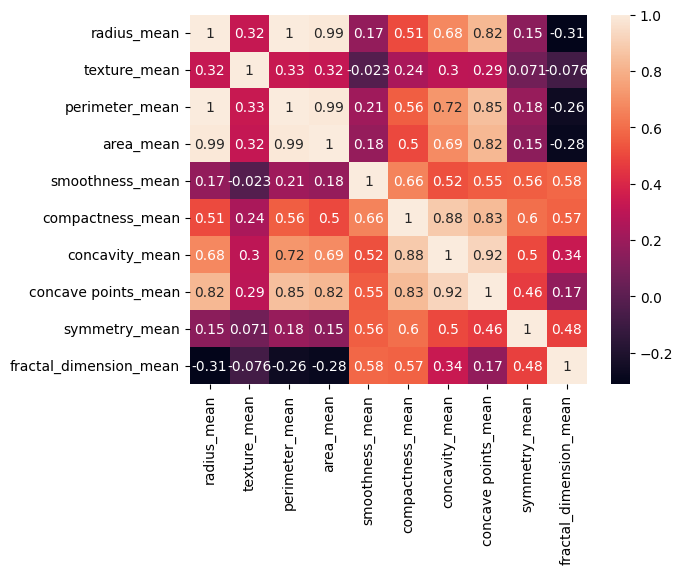

In [ ]:
sns.heatmap(data_df[mean_features].corr(), annot=True)
plt.show()

3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`.

In [ ]:
data_df= data_df[['diagnosis','texture_mean', 'radius_mean', 'smoothness_mean','compactness_mean','symmetry_mean', 'fractal_dimension_mean',
                  'radius_se', 'texture_se','compactness_se','smoothness_se','symmetry_se','fractal_dimension_se']]

In [ ]:
data_df.columns

Index(['diagnosis', 'texture_mean', 'radius_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'compactness_se', 'smoothness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

Observa la distribución de las variables resultantes (deben ser 12):

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1.

In [ ]:
skew_cols= data_df.skew(numeric_only=True).to_frame()[0]>1
skew_cols= skew_cols[skew_cols].index
skew_cols

Index(['compactness_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'compactness_se', 'smoothness_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

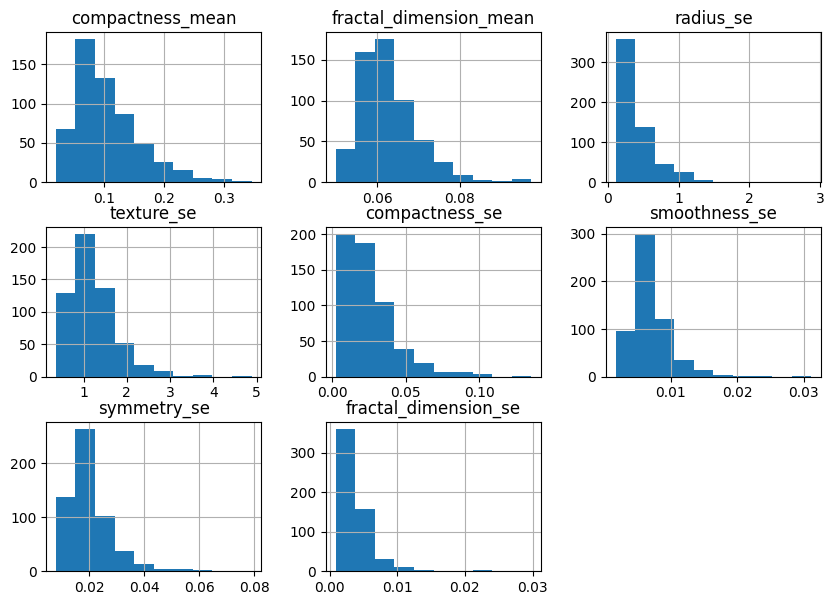

In [ ]:
figure= plt.figure()
data_df[skew_cols].hist(figsize=(10,7))
plt.show()


4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


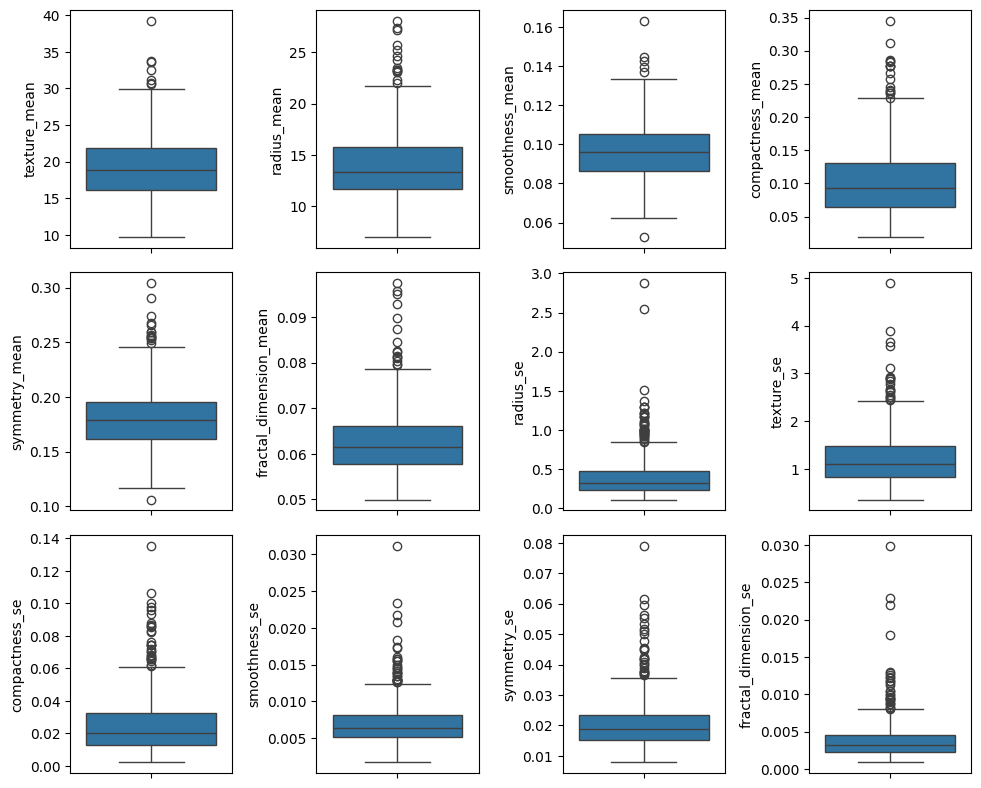

In [ ]:
fig, axes= plt.subplots(3,4, figsize=(10,8))

for i, col in enumerate(data_df.select_dtypes(include=['float64'])):
  sns.boxplot(data=data_df, y=col, ax=axes[i//4, i%4])
plt.tight_layout()

In [ ]:
scale_cols= ['texture_se', 'radius_se', 'radius_mean', 'texture_mean']

Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [ ]:
data_df= pd.read_csv('data.csv', index_col='id')

In [ ]:
X= data_df.drop(columns='diagnosis')
y= data_df['diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.8, random_state=1)

5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [ ]:
from math import remainder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

Para hacer un transformador que elimine las columnas deseadas y aplicarlo en un pipeline, se debe crear una clase con las características necesarias para que este pueda ser aceptado dentro del pipeline.

In [ ]:
class drop_columns_transformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=self.columns_to_drop)

In [ ]:
cols_to_drop=worst_features + ['perimeter_mean','area_mean','concavity_mean', 'concave points_mean']+ scale_cols
len(cols_to_drop)

18

In [ ]:
preprocessing= ColumnTransformer(transformers=[('drop_columns', drop_columns_transformer(cols_to_drop), cols_to_drop)], remainder='passthrough')

5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística.

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo.

In [ ]:
from sklearn.linear_model import LogisticRegression
logr_model= Pipeline([('preprocessing', preprocessing),
                      ('logr', LogisticRegression())])

In [ ]:
logr_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns',
                                                  drop_columns_transformer(columns_to_drop=['radius_worst',
                                                                                            'texture_worst',
                                                                                            'perimeter_worst',
                                                                                            'area_worst',
                                                                                            'smoothness_worst',
                                                                                            'compactness_worst',
                                                                                            'concavity_worst',
                                                                                            'concave '
                                                                                            'points_worst',
                                                                                            'symmetry_worst',
                                                                                            'fractal_dimension_worst',
                                                                                            'perimeter_mean',...
                                                                                            'texture_mean']),
                                                  ['radius_worst',
                                                   'texture_worst',
                                                   'perimeter_worst',
                                                   'area_worst',
                                                   'smoothness_worst',
                                                   'compactness_worst',
                                                   'concavity_worst',
                                                   'concave points_worst',
                                                   'symmetry_worst',
                                                   'fractal_dimension_worst',
                                                   'perimeter_mean',
                                                   'area_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'texture_se', 'radius_se',
                                                   'radius_mean',
                                                   'texture_mean'])])),
                ('logr', LogisticRegression())])

In [ ]:
predictions1= logr_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions1, labels=['B','M']))

[[70  2]
 [11 31]]


Hay 70 verdaderos negativos, 11 falsos negativos, 2 falsos positivos y 31 verdaderos positivos.

In [ ]:
print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

           B       0.86      0.97      0.92        72
           M       0.94      0.74      0.83        42

    accuracy                           0.89       114
   macro avg       0.90      0.86      0.87       114
weighted avg       0.89      0.89      0.88       114



Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'`

In [ ]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
skew_transformer= Pipeline(steps=[('power', PowerTransformer())])
scale_transformer= Pipeline(steps=[('scale', MinMaxScaler())])

In [ ]:
cols_to_drop=worst_features + ['perimeter_mean','area_mean','concavity_mean', 'concave points_mean']

In [ ]:
preprocessing2= ColumnTransformer(transformers=[('drop_columns', drop_columns_transformer(cols_to_drop), cols_to_drop),
                                                 ('skew', skew_transformer, skew_cols),
                                                 ('scale', scale_transformer, scale_cols)], remainder='passthrough',force_int_remainder_cols=False)

6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

In [ ]:
logr_model2= Pipeline([('preprocessing', preprocessing2),
                      ('logr', LogisticRegression())])

In [ ]:
logr_model2.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('drop_columns',
                                                  drop_columns_transformer(columns_to_drop=['radius_worst',
                                                                                            'texture_worst',
                                                                                            'perimeter_worst',
                                                                                            'area_worst',
                                                                                            'smoothness_worst',
                                                                                            'compactness_worst',
                                                                                            'concavity_worst',
                                                                                            'concave '
                                                                                            'points_worst',
                                                                                            'symmetry_worst',
                                                                                            'fractal_dim...
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer())]),
                                                  Index(['compactness_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'compactness_se', 'smoothness_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')),
                                                 ('scale',
                                                  Pipeline(steps=[('scale',
                                                                   MinMaxScaler())]),
                                                  ['texture_se', 'radius_se',
                                                   'radius_mean',
                                                   'texture_mean'])])),
                ('logr', LogisticRegression())])

In [ ]:
predictions2= logr_model2.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, predictions2, labels=['B','M']))

[[70  2]
 [10 32]]


In [ ]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           B       0.88      0.97      0.92        72
           M       0.94      0.76      0.84        42

    accuracy                           0.89       114
   macro avg       0.91      0.87      0.88       114
weighted avg       0.90      0.89      0.89       114



# **Parte 3**. Modelo con aplicación de PCA

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
principal_components= pca.fit_transform(X_scaled)

In [ ]:
principal_components = pd.DataFrame(principal_components,columns=scaler.get_feature_names_out())
print(principal_components.shape)

principal_components.head()

(569, 30)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,9.192837,1.948583,-1.123166,-3.633731,1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,...,-0.096515,-0.068850,-0.084519,-0.175256,-0.151020,0.201503,-0.252585,0.033914,-0.045648,0.047169
1,2.387802,-3.768172,-0.529293,-1.118264,-0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,...,0.077327,0.094578,0.217718,0.011290,-0.170510,0.041129,0.181270,-0.032624,0.005687,0.001868
2,5.733896,-1.075174,-0.551748,-0.912083,0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,...,-0.311067,0.060309,0.074291,0.102762,0.171158,-0.004735,0.049569,-0.047026,-0.003146,-0.000751
3,7.122953,10.275589,-3.232790,-0.152547,2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,...,-0.434193,0.203266,0.124105,0.153430,0.077496,0.275225,0.183462,-0.042484,0.069295,0.019937
4,3.935302,-1.948072,1.389767,-2.940639,-0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,...,0.116545,0.017650,-0.139454,-0.005332,0.003062,-0.039254,0.032168,0.034786,-0.005038,-0.021214


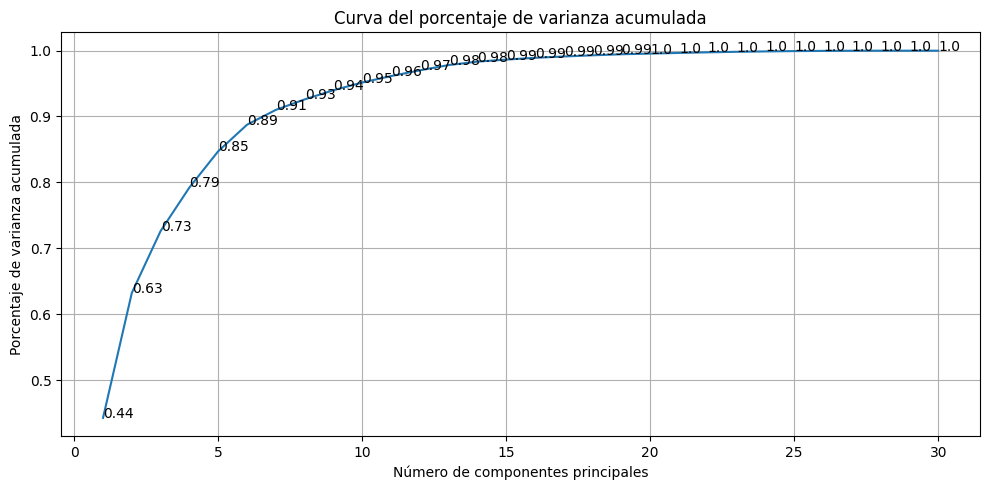

In [ ]:
variance_ratio= list(np.round(pca.explained_variance_ratio_, decimals=4))
plt.figure(figsize=(10,5))
plt.plot(range(1, len(variance_ratio)+1), np.cumsum(variance_ratio))

for i in range(len(variance_ratio)):
  plt.annotate(np.round(np.cumsum(variance_ratio)[i],decimals=2), (i+1, np.cumsum(variance_ratio)[i]))

plt.xlabel('Número de componentes principales')
plt.ylabel('Porcentaje de varianza acumulada')
plt.title('Curva del porcentaje de varianza acumulada')
plt.tight_layout()
plt.grid()
plt.show()

Según los resultados obtenidos por la prueba de componentes principales, para obtener una explicación de varianza del 99% es necesario considerar 16 componentes.

9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

In [ ]:
log_model3= Pipeline(steps=[('scaler', StandardScaler()),
                            ('pca', PCA(n_components=0.99)),
                            ('logr',LogisticRegression())])



In [ ]:
log_model3.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.99)),
                ('logr', LogisticRegression())])

In [ ]:
predictions3= log_model3.predict(X_test)
print(confusion_matrix(y_test, predictions3, labels=['B','M']))

[[72  0]
 [ 2 40]]


In [ ]:
print(classification_report(y_test, predictions3))

              precision    recall  f1-score   support

           B       0.97      1.00      0.99        72
           M       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué?